In [1160]:
import requests
import os
import tweepy
import numpy
import json
import pandas as pd
import time
import re
import warnings # to disable warnings


# for plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Gather

In [3]:
# read the csv file into a pandas dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [76]:
# Use requests library to download the tsv file
#Method 1
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# write content to a file in human readable format
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

# Read content of the image tsv file into a dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t', encoding = 'utf-8')

In [4]:
# Keys for twitter app
consumer_key = 'PAjegZIdIw9FqsbjiBiB32Me8'
consumer_secret = 'PVGym2PO42wBEPELVLocH9sltQ2kYg3NdwcFEUodSAtTMlyQhv'
access_token = '984782607375155200-j3SIS7VVW0mM1I3SJPGuRSfkK5EBpn3'
access_token_secret = 'mcOjYsvq2Tw1QBXBdWUkIbys69kbzWgKF73i4bJ4kaQ9W'

In [17]:
# Variables created for tweepy query
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,
                 wait_on_rate_limit = True, # automatically wait for rate limits to replenish
                 wait_on_rate_limit_notify = True)# print notification when rate limit is waiting to replenish

In [1111]:
# For loop which will add each available tweet to a new line of tweet_json.txt
# Save the contents to a file
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet_json.txt, f)
            f.write('\n')
        except:
            continue

In [1113]:
# Explore the structure
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


In [1114]:
# read the downloaded file to twitter_images dataframe
twitter_images = pd.read_csv('image-predictions.tsv', sep ='\t', encoding = 'utf -8')
twitter_images.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [90]:
# create a list of dictionaries of our result. Each dictionary will contain data from API calls for each tweet id
df_list =[]
# list to store the tweet_ids that returned errors
error_list=[]

# measure the start time
start  = time.time()

# Write the json for each api call using tweet id into a file with each entry written in separate lines
# Open a file to write the contents to
with open('tweet_json.txt', 'a', encoding = 'utf-8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet_json = api.get_status(tweet_id, tweet_mode ='extended')
            #print(tweet_json)
            # write json contents to a file
            json.dump(tweet_json._json, f) # to write only the json content and not the status which in the first line
            f.write('\n')
        except:
            continue
        
# Calculate the execution time
end = time.time()
print('Time duration ', end-start)

Rate limit reached. Sleeping for: 480
Rate limit reached. Sleeping for: 380


Time duration  2024.967821598053


#### Below is optional as the column variables are extracted for each API call and are not stored into a text file to avoid API callsm

In [91]:
# create a list of dictionaries of our result. Each dictionary will contain data from API calls for each tweet id
df_list =[]
# list to store the tweet_ids that returned errors
error_list=[]

# measure the start time
start  = time.time()

for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet_json = api.get_status(tweet_id, tweet_mode ='extended')
        # Getting other data that is needed from the json
        favourites = tweet_json.favorite_count # count of favourites
        retweets = tweet_json.retweet_count # count of retweets
        user_favourites = tweet_json.user.favourites_count # user favourites
        user_followers = tweet_json.user.followers_count # user followers
        friends_count = tweet_json.user.friends_count # friend count
        tweet_text = tweet_json.full_text
        image_url = tweet_json.user.profile_image_url_https # image url
        created_at = tweet_json.created_at # the date and time of creation
        
        # Store the data into a list where we store dictionaries
        df_list.append({'tweet_id': int(tweet_id),
                    'favourites': int(favourites),
                    'retweets': int(retweets),
                    'user_favourites': int(user_favourites),
                    'user_followers': int(user_followers),
                    'friends_count': int(friends_count),
                    'tweet_text': str(tweet_text),
                    'image_url': str(image_url),
                    'created_at': pd.to_datetime(created_at)})
        
# To catch the exceptions of the tweet errors        
    except Exception as e:
        print(str(tweet_id)+"_"+ str(e))
        error_list.append(tweet_id)

# Calculate the execution time
end = time.time()
print('Time duration ', end-start)

888202515573088257_[{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921_[{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329_[{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744_[{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320_[{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705_[{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648_[{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308_[{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977_[{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832_[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 517


790946055508652032_Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)
775096608509886464_[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 265


Time duration  2283.62761592865


In [96]:
len(error_list)

12

### optional

In [92]:
# Some testing

for tweet_id in twitter_archive['tweet_id']:
    tweet_json = api.get_status(tweet_id, tweet_mode = 'extended')
    #page1 = json.dumps(page._json, indent=4)
    favourites = tweet_json.favorite_count # count of favourites
    retweets = tweet_json.retweet_count # count of retweets
    user_favourites = tweet_json.user.favourites_count # user favourites
    user_followers = tweet_json.user.followers_count # user followers
    friends_count = tweet_json.user.friends_count # friend count
    tweet_text = tweet_json.full_text
    image_url = tweet_json.user.profile_image_url_https # image url
    created_at = tweet_json.created_at # the date and time of creation
    
    print(favourites)
    print(retweets)
    print(user_favourites)
    print(user_followers, '\n')
    print(friends_count, '\n')
    print(tweet_text,'\n')
    print(image_url,'\n')
    print(created_at)
    
    break

38970
8643
132902
6515174 

103 

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU 

https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg 

2017-08-01 16:23:56


##### Since reworking to create the df_list[] is time consuming, I will use 'tweet_json.txt' to extract the information needed

In [7]:
# Create a tweet dataframe
tweet_df = pd.DataFrame()

In [37]:
# Read the contents on the 'tweet_json.txt' into a list as it is currently a string of dictionaries of json
# Loop through and append to a list

tweets_list_data = []

with open('tweet_json.txt', 'r') as tweet_file:
    for line in tweet_file:
        try:
            tweet = json.loads(line)
            tweets_list_data.append(tweet)
        except:
            contine
tweet_file.close()

##### Eamining contents of the list

In [44]:
#first 2 items in the list
tweets_list_data[:1]

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'media': [{'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'sizes': {'large': {'h': 528, 'resize': 'fit', 'w': 540},
      'medium': {'h': 528, 'resize': 'fit', 'w': 540},
      'small': {'h': 528, 'resize': 'fit', 'w': 540},
      'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
     'type': 'photo',
     'url': 'https://t.co/MgUWQ76dJU'}],
   'symbols': [],
   'urls': [],
   'user_mentions': []},
  'extended_entities': {'media': [{'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'htt

In [65]:
# Create a dataframe
tweet_info_df = pd.DataFrame()

In [1116]:
# Adding selected variables to the dataframe
# using the lambda function
# ref: https://www.python-course.eu/lambda.php
# map() can be applied to more than one list. 
# The lists have to have the same length. map() will apply its lambda function to the elements of the argument lists, i.e. it first applies to the elements with the 0th index, then to the elements with the 1st index until the n-th index is reached:
#>>> a = [1,2,3,4]
#>>> b = [17,12,11,10]
#>>> c = [-1,-4,5,9]
#>>> map(lambda x,y,z:x+y-z, a,b,c) - apply the function on the arguments x,y,z for a,b,c
#[19, 18, 9, 5]
# map(function_to_apply, list_of_inputs)
# map function takes a column as a parameter and assigns the result to this column

#list(map(lambda tweet: tweet['id'], tweets_list_data))

#Storing the information into a DF

tweet_info_df['id'] = list(map(lambda tweet: tweet['id'], tweets_list_data))
tweet_info_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_list_data))
tweet_info_df['retweets'] = list(map(lambda tweet: tweet['retweet_count'], tweets_list_data))
tweet_info_df['user_favorites'] = list(map(lambda tweet: tweet['user']['favourites_count'], tweets_list_data))
tweet_info_df['user_followers'] = list(map(lambda tweet: tweet['user']['followers_count'], tweets_list_data))
tweet_info_df['friends_count'] = list(map(lambda tweet: tweet['user']['friends_count'], tweets_list_data))
tweet_info_df['tweets_text'] = list(map(lambda tweet: tweet['full_text'], tweets_list_data))
tweet_info_df['image_url'] = list(map(lambda tweet: tweet['user']['profile_image_url_https'], tweets_list_data))
tweet_info_df['created_at'] = list(map(lambda tweet: tweet['created_at'], tweets_list_data))

#### Inspect the tweet_info_df dataframe created

In [1117]:
tweet_info_df.head(5)

,id,favorite_count,retweets,user_favorites,user_followers,friends_count,tweets_text,image_url,created_at
0,892420643555336193,38971,8642,132902,6512511,103,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg,Tue Aug 01 16:23:56 +0000 2017
1,892420643555336193,38971,8642,132902,6512757,103,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg,Tue Aug 01 16:23:56 +0000 2017
2,892420643555336193,38970,8643,132902,6513628,103,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg,Tue Aug 01 16:23:56 +0000 2017
3,892177421306343426,33356,6351,132902,6513629,103,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg,Tue Aug 01 00:17:27 +0000 2017
4,891815181378084864,25143,4213,132902,6513629,103,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg,Mon Jul 31 00:18:03 +0000 2017


##### Change the create_at to pandas date time format

In [71]:
tweet_info_df.created_at = pd.to_datetime(tweet_info_df.created_at)

In [72]:
tweet_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 9 columns):
id                2366 non-null int64
favorite_count    2366 non-null int64
retweets          2366 non-null int64
user_favorites    2366 non-null int64
user_followers    2366 non-null int64
friends_count     2366 non-null int64
tweets_text       2366 non-null object
image_url         2366 non-null object
created_at        2366 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 166.4+ KB


#### Information in the twitter_archive Dataframe

In [73]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [74]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [75]:
# Some descriptive statistics about the twitter_archive DF
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [1127]:
mask = (twitter_archive.name.str.len() < 4)
twitter_archive.loc[mask]['name'].value_counts()

a      55
Bo     9 
the    8 
an     7 
Jax    6 
Leo    6 
Gus    5 
one    4 
Mia    3 
Ted    3 
Max    3 
not    2 
Moe    2 
Bob    2 
Doc    2 
Lou    2 
Sam    2 
Ava    2 
Eli    2 
Tyr    2 
Eve    2 
Ash    2 
mad    2 
Ken    2 
Zoe    1 
Gin    1 
Mac    1 
Jo     1 
Sid    1 
Jay    1 
      .. 
Mo     1 
by     1 
old    1 
JD     1 
Dot    1 
Aja    1 
Tug    1 
O      1 
all    1 
Sky    1 
Amy    1 
Cal    1 
Ole    1 
Obi    1 
Ito    1 
Ace    1 
Tom    1 
Edd    1 
Mya    1 
Pip    1 
Jeb    1 
Taz    1 
Jim    1 
Dex    1 
Ike    1 
Alf    1 
Ben    1 
my     1 
Jed    1 
Dug    1 
Name: name, Length: 68, dtype: int64

In [1128]:
# Check name column for any discrepancies
# From the names, it appears that names in lowercase are not valid names
twitter_archive.name.sort_values()

1035    Abby        
1021    Abby        
938     Ace         
1933    Acro        
1327    Adele       
1934    Aiden       
77      Aja         
480     Akumi       
820     Al          
875     Albert      
1954    Albert      
144     Albus       
412     Albus       
1115    Aldrick     
2046    Alejandro   
374     Alexander   
1189    Alexanderson
486     Alf         
2238    Alfie       
661     Alfie       
367     Alfie       
1616    Alfie       
858     Alfie       
51      Alfy        
201     Alice       
1701    Alice       
1495    Amber       
1334    Ambrose     
2078    Amy         
2195    Amélie      
         ...        
852     my          
988     not         
335     not         
1747    officially  
1206    old         
993     one         
1936    one         
924     one         
369     one         
2326    quite       
169     quite       
118     quite       
193     quite       
2030    space       
22      such        
2345    the         
2346    the  

In [1130]:
list(twitter_archive)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [1131]:
# View rows in the column name which are in lower case, which indicates its not a valid name
twitter_archive.loc[twitter_archive.name.str.islower()][['text', 'name']]

,text,name
22,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
56,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
118,RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,quite
169,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite
193,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
335,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,not
369,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
542,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly
649,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
682,RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX,mad


In [1135]:
# We can find real names in the text column following 'named' or 'name'

# Finding names for text containing 'named' in the above search
twitter_archive.loc[(twitter_archive.name.str.islower()) & (twitter_archive.text.str.contains('named'))][['text', 'name']]

,text,name
1853,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,a
1955,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,a
2034,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,a
2066,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,a
2116,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,a
2125,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,a
2128,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,a
2146,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,a
2161,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,a
2191,This is a Slovakian Helter Skelter Feta named Leroi. Likes to skip on roofs. Good traction. Much balance. 10/10 wow! https://t.co/Dmy2mY2Qj5,a


In [1136]:
# Finding names for text containing 'name is' in the above search
twitter_archive.loc[(twitter_archive.name.str.islower()) & (twitter_archive.text.str.contains('name is'))][['text', 'name']]

,text,name
852,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,my
2287,This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,a


In [1141]:
# Check for any 2 or 1 letter names in the names column
# Out of the 56 single character in 'name' column, there is one 'O'
mask = (twitter_archive.name.str.len() < 2)
twitter_archive.loc[mask]['name'].value_counts()

a    55
O    1 
Name: name, dtype: int64

In [1142]:
# Check for the row in twitter_archive with name 'O'
# Real name is 'O'Malley'
twitter_archive[twitter_archive.name == 'O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,NaN,NaN,NaT,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O,None,None,None,None


In [77]:
# Information about image_prediction dataframe
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [78]:
# information on the image dataframe
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [79]:
# describe
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Examining the archive dataset in details

In [86]:
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#####  Examine the data types

In [83]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Some data quality issues
- Some Missing data for expanded urls
- Convert timestamp to date time format for columns - timestamp, retweeted_status_timestamp

In [85]:
# Missing url for images
twitter_archive.expanded_urls.isnull().value_counts()

False    2297
True       59
Name: expanded_urls, dtype: int64

##### Missing image url data for 59 tweet ids
##### Image url available for 2297 tweet ids

In [95]:
# Convert timestamp to date time format
twitter_archive.timestamp = pd.to_datetime(twitter_archive.timestamp)
twitter_archive.retweeted_status_timestamp = pd.to_datetime(twitter_archive.retweeted_status_timestamp)

#####  Examine the source in twitter_archive DF

In [89]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Most of the users are mobile users who have downloaded twitter to their iphones - 2221 users

In [96]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

##### Examine the texts

In [137]:
# Examining the texts that contain a 'This is'
# 'This is' is usally followed by a name
twitter_archive.text.str.contains('This is').value_counts()

True     1264
False    1092
Name: text, dtype: int64

In [149]:
# Eamining the 'text and 'name' field side by side
# From this it appears the way the names have been captured is the text that immediately follows a 'This is'
twitter_archive[twitter_archive.text.str.contains('This is')][['text', 'name']]

,text,name
0,This is Phineas. He's a mystical boy. Only eve...,Phineas
1,This is Tilly. She's just checking pup on you....,Tilly
2,This is Archie. He is a rare Norwegian Pouncin...,Archie
3,This is Darla. She commenced a snooze mid meal...,Darla
4,This is Franklin. He would like you to stop ca...,Franklin
8,This is Zoey. She doesn't want to be one of th...,Zoey
9,This is Cassie. She is a college pup. Studying...,Cassie
10,This is Koda. He is a South Australian decksha...,Koda
11,This is Bruno. He is a service shark. Only get...,Bruno
13,This is Ted. He does his best. Sometimes that'...,Ted


In [199]:
# Search text for string containing 'named' as this is followed by a name, for which name column is 'a'
# Accordingly the name column need to be edited to include this name which is missing there
twitter_archive[(twitter_archive.name == 'a') & (twitter_archive.text.str.contains('named'))][['text', 'name']]

,text,name
1853,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,a
1955,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,a
2034,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,a
2066,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,a
2116,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,a
2125,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,a
2128,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,a
2146,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,a
2161,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,a
2191,This is a Slovakian Helter Skelter Feta named Leroi. Likes to skip on roofs. Good traction. Much balance. 10/10 wow! https://t.co/Dmy2mY2Qj5,a


In [201]:
# Similarly look for 'name' in text column but not 'named' as it has been captured
# There is only one row
twitter_archive[(twitter_archive.name == 'a') & (twitter_archive.text.str.contains('name')) & ~(twitter_archive.text.str.contains('named'))][['text', 'name']]

,text,name
2287,This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,a


In [145]:
twitter_archive.name.value_counts().head(10)

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Penny       10
Lola        10
Tucker      10
Bo           9
Name: name, dtype: int64

#####  Out of the 2356 names, 745 are None or Nulls and 55 names have 'a'.  So a total of 800 names are not valid. I will need to check if the names are captured in the text column for those dogs whose name is 'None' or 'a'

In [152]:
# Changing the option for max colum with to see text content
pd.set_option('display.max_colwidth', -1)

In [203]:
twitter_archive.name.value_counts()

None            745
a               55 
Charlie         12 
Cooper          11 
Oliver          11 
Lucy            11 
Penny           10 
Lola            10 
Tucker          10 
Bo              9  
Winston         9  
Sadie           8  
the             8  
Toby            7  
an              7  
Daisy           7  
Buddy           7  
Bailey          7  
Milo            6  
Scout           6  
Leo             6  
Stanley         6  
Koda            6  
Dave            6  
Bella           6  
Oscar           6  
Rusty           6  
Jax             6  
Jack            6  
Bentley         5  
               ..  
Bodie           1  
Tobi            1  
Snicku          1  
Dante           1  
Brady           1  
Cecil           1  
Meatball        1  
Amber           1  
Charleson       1  
Kial            1  
Jennifur        1  
Peanut          1  
Fwed            1  
Reptar          1  
Jeremy          1  
Tayzie          1  
Beemo           1  
Jed             1  
Ralphy          1  


In [205]:
# This row may need to be removed as there is no information and may not be relevant
twitter_archive[twitter_archive.name == 'unacceptable']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1121,730924654643314689,NaN,NaN,2016-05-13 00:56:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Pls stop sending non-canines like this Bulgarian Eyeless Porch Bear. This is unacceptable... 9/10 https://t.co/2yctWAUZ3Z,NaN,NaN,NaT,https://twitter.com/dog_rates/status/730924654643314689/photo/1,9,10,unacceptable,None,None,None,None


In [210]:
# Ref : https://stackoverflow.com/questions/19937362/python-pandas-filter-string-data-based-on-its-string-length
# Look for dog names which are less than 2 characters

mask = (twitter_archive.name.str.len() < 2)
twitter_archive.loc[mask]['name'].value_counts()

a    55
O    1 
Name: name, dtype: int64

In [212]:
# dog name with 'O'
# Need to replace the name with 'O'Malley'
twitter_archive[twitter_archive.name == 'O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,NaN,NaN,NaT,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O,None,None,None,None


In [1154]:
# Change name for 'O' to O'Malley using the df.loc(row_index, column_index)
twitter_archive.loc[(twitter_archive.tweet_id == 776201521193218049) & (twitter_archive.name == 'O'),['name']] = "O'Malley"

In [1157]:
# test
twitter_archive[twitter_archive.tweet_id == 776201521193218049][['text', 'name']]

,text,name
775,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,O'Malley


In [1161]:
# warnings disable
warnings.simplefilter('ignore')

In [1163]:
# Check for rows which have a rating of XX.XX / XX which indicates a decimal for the numerator
# Compare them with the rating_numerator column
# rating_denominator is the same as seen in the text
# Rating numerator with decimal values are captured incorrectly and needs to be replaced with what appears in text
twitter_archive[twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [238]:
twitter_archive[twitter_archive.text.str.contains(r"(\d+.*/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

C:\Users\dkaithav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator,rating_denominator
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10
8,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13,10
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10


In [1164]:
# Tweet id - 810984652412424192 doesn't have a rating but is not captured by regex as it contains a '24/7'
# rating_numerator and denominator matches this and does look to be a proper rating and this needs to be removed
twitter_archive[twitter_archive.tweet_id == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaT,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None


### Quality issues

- Incorrect dog names. dog names in lower cases are mostly incorrect
- Rating numerators with decimals are incorrect
- Tweet with more than one XX.XX /XX sometimes have the first occurence erroneously used for the rating numerators and denominators
- Tweets with no images
- Dataset contains retweets
- Contents of 'text' appear to be cut of but this is fixed by changing the column width
- Incorrect datatypes fixed 
- Tweet ID# 810984652412424192 doesn't contain a rating. Rating captured in numerator /denominator is improper

### Tidiness issue

- Dog "stage" variable in four columns: doggo, floofer, pupper, puppo and we will melt these columns
- Join dataframes - in this case,we will join the image_predictions, tweet_info_df to twitter_archive
- Choosing only relevant columns as the resultant DF mayhave many columns that may be correlated.
- Merge all dataframes into one master df

### Clean

In [1165]:
# Creating copies of the dataframes
twitter_archive_clean = twitter_archive.copy()
tweet_info_df_clean = tweet_info_df.copy()
image_predictions_clean = image_predictions.copy()

#####  check the columns of individual dataframes before they can be merged.
- They will be merged on the basis of tweet id
- The 3 dataframes will be
 - twitter_archive_clean
 - tweet_info_df_clean
 - image_predictions_clean

In [1166]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [1167]:
list(tweet_info_df_clean)

['id',
 'favorite_count',
 'retweets',
 'user_favorites',
 'user_followers',
 'friends_count',
 'tweets_text',
 'image_url',
 'created_at']

In [1000]:
list(image_predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [1169]:
# Rename column for 'id' in 'tweet_info_df_clean' to 'tweet_id'
tweet_info_df_clean.rename(columns = {'id': 'tweet_id'}, inplace = True)

In [1170]:
# verify the change
list(tweet_info_df_clean)

['tweet_id',
 'favorite_count',
 'retweets',
 'user_favorites',
 'user_followers',
 'friends_count',
 'tweets_text',
 'image_url',
 'created_at']

In [1171]:
# Merge dataframes so that there is one tidy and cleaned up dataframe
# Merge the 3 dataframes on basis of tweet_id
# Save the resultant dataframe to a csv file for backup

#Exisitng dataframes-
#tweet_info_df_clean
#twitter_archive_clean
#image_predictions_clean

# creating the master dataframe from all the other dataframes
# We will use as we will try to match based on the keys - tweet ids in the twitter_archive
df_master = pd.merge(left = twitter_archive_clean, right = image_predictions_clean, on = 'tweet_id', how = 'left')
df_master = pd.merge(left = df_master, right = tweet_info_df_clean, on = 'tweet_id', how = 'left')
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p3_conf,p3_dog,favorite_count,retweets,user_favorites,user_followers,friends_count,tweets_text,image_url,created_at
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.076110,False,38971.0,8642.0,132902.0,6512511.0,103.0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg,Tue Aug 01 16:23:56 +0000 2017
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.076110,False,38971.0,8642.0,132902.0,6512757.0,103.0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg,Tue Aug 01 16:23:56 +0000 2017
2,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.076110,False,38970.0,8643.0,132902.0,6513628.0,103.0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg,Tue Aug 01 16:23:56 +0000 2017
3,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.076110,False,38970.0,8643.0,132902.0,6513884.0,103.0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg,Tue Aug 01 16:23:56 +0000 2017
4,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.068957,True,33356.0,6351.0,132902.0,6513629.0,103.0,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg,Tue Aug 01 00:17:27 +0000 2017


In [1172]:
# columns in the resultant merged dataframe
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2377 entries, 0 to 2376
Data columns (total 36 columns):
tweet_id                      2377 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2377 non-null datetime64[ns]
source                        2377 non-null object
text                          2377 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2318 non-null object
rating_numerator              2377 non-null int64
rating_denominator            2377 non-null int64
name                          2377 non-null object
doggo                         2377 non-null object
floofer                       2377 non-null object
pupper                        2377 non-null object
puppo                         2377 non-null object
jpg_url         

In [1173]:
# Saving the df_master to a csv file for backup
df_master.to_csv('df_master.csv', encoding = 'utf-8')

In [1174]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2377 entries, 0 to 2376
Data columns (total 36 columns):
tweet_id                      2377 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2377 non-null datetime64[ns]
source                        2377 non-null object
text                          2377 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2318 non-null object
rating_numerator              2377 non-null int64
rating_denominator            2377 non-null int64
name                          2377 non-null object
doggo                         2377 non-null object
floofer                       2377 non-null object
pupper                        2377 non-null object
puppo                         2377 non-null object
jpg_url         

#### A quick clean up to remove columns that are not needed
- Remove all columns related to 'retweets'
    - 'retweeted_status_id'
    - 'retweeted_status_user_id'
    - 'retweeted_status_timestamp'
- Columns 'timestamp', 'created_at' are the same
    - So we can remove one of them - 'created_at'
- Remove image_url as this is synomous with jpg_url
- Remove duplicates in tweet_id
- Remove tweet with no image urls

In [1175]:
columns_to_drop = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'created_at', 'image_url', 'expanded_urls']
# change and verify column list
df_master.drop(columns_to_drop, axis = 1, inplace = True)

In [1177]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2377 entries, 0 to 2376
Data columns (total 30 columns):
tweet_id                 2377 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2377 non-null datetime64[ns]
source                   2377 non-null object
text                     2377 non-null object
rating_numerator         2377 non-null int64
rating_denominator       2377 non-null int64
name                     2377 non-null object
doggo                    2377 non-null object
floofer                  2377 non-null object
pupper                   2377 non-null object
puppo                    2377 non-null object
jpg_url                  2096 non-null object
img_num                  2096 non-null float64
p1                       2096 non-null object
p1_conf                  2096 non-null float64
p1_dog                   2096 non-null object
p2                       2096 non-null object
p2_conf       

#### Duplicates in tweet id exists and they need to be removed

In [1179]:
# Check for duplicates in 'tweet_id'
df_master.tweet_id.duplicated().value_counts() # Duplicates exist and they need to be removed

False    2356
True     21  
Name: tweet_id, dtype: int64

In [1180]:
df_master.drop_duplicates(subset = 'tweet_id', inplace =True)

In [1183]:
# test - duplicates in tweet id removed
df_master.tweet_id.duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

#### Remove tweets that don't have a image_url

In [1199]:
# Check which all columns have NaN values
#df_master.isna().any()
df_master.isnull().any()

# for jpg_url
df_master.jpg_url.isnull().value_counts()
# There are about 281 null values in jpg_url column

False    2075
True     281 
Name: jpg_url, dtype: int64

In [1202]:
# remove the tweets associated with null jpg_url
df_master.dropna(subset = ['jpg_url'], inplace = True)

In [1205]:
#test
df_master.jpg_url.isnull().value_counts()
# No null values for jpg_url

False    2075
Name: jpg_url, dtype: int64

#### Melt the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column 'dog_stage'

In [1206]:
# Checking the values in these columns for the different dog stages

print('doggo count - ', df_master.doggo.value_counts()['doggo'])
print('floofer count - ', df_master.floofer.value_counts()['floofer'])
print('pupper count - ', df_master.pupper.value_counts()['pupper'])
print('puppo count - ', df_master.puppo.value_counts()['puppo'])

doggo count -  80
floofer count -  8
pupper count -  222
puppo count -  24


In [1207]:
# select the columns to melt
columns_to_melt = ['doggo', 'floofer', 'pupper', 'puppo']
# The rest of the columns will stay as rows
columns_stay = [x for x in df_master.columns.tolist() if x not in columns_to_melt]

#print(columns_stay)
# Now melt the dataframe

# Melt the the columns into values
df_master = pd.melt(df_master, id_vars = columns_stay, value_vars = columns_to_melt, 
                         var_name = 'stages', value_name = 'dog_stage')

In [1208]:
# Test for dog_stages
df_master.dog_stage.value_counts()

None       7966
pupper     222 
doggo      80  
puppo      24  
floofer    8   
Name: dog_stage, dtype: int64

In [1209]:
# There are mulitple columns with repect to image predictions
# Inspecting them
# Extracting the columns with respect to predictions only
# To disable warning
# warnings.simplefilter('ignore')

predictions_columns = df_master.columns[df_master.columns.str.contains(r"(p\d_?[a-z]*)")]
df_master[predictions_columns].head(5)

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [1210]:
# Storing the first true algorithm and it's level of confidence 
# prediction algoirthm can be p1, p2, p3
# confidence level is tored in p*_dog

prediction_algorithm = []
confidence_level = []

# Creat a function for the same

def get_confidence_prediction(df):
    if df['p1_dog'] == True:
        prediction_algorithm.append(df['p1'])
        confidence_level.append(df['p1_conf'])
    elif df['p2_dog']  == True:
        prediction_algorithm.append(df['p2'])
        confidence_level.append(df['p2_conf'])
    elif df['p3_dog']  == True:
        prediction_algorithm.append(df['p3'])
        confidence_level.append(df['p3_conf'])
    else:
        prediction_algorithm.append('NaN')
        confidence_level.append(0)

# Using apply, function for every row
df_master[predictions_columns].apply(get_confidence_prediction, axis =1)
# creating new columns
df_master['prediction_algorithm'] = prediction_algorithm
df_master['confidence_level'] = confidence_level

In [1211]:
# Test
df_master[['prediction_algorithm', 'confidence_level']].sample(5)

,prediction_algorithm,confidence_level
2340,Cardigan,0.160888
1921,beagle,0.319110
2005,NaN,0.000000
6561,Samoyed,0.585441
3749,soft-coated_wheaten_terrier,0.340806


In [1212]:
list(df_master)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorite_count',
 'retweets',
 'user_favorites',
 'user_followers',
 'friends_count',
 'tweets_text',
 'stages',
 'dog_stage',
 'prediction_algorithm',
 'confidence_level']

In [1213]:
# Columns to drop relate to the prediction
# predictions_columns
df_master.drop(predictions_columns, axis = 1, inplace = True)

In [1214]:
# Drop the 'imag_num' column
df_master.drop('img_num', axis =1, inplace = True)

In [1215]:
# test
list(df_master)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'favorite_count',
 'retweets',
 'user_favorites',
 'user_followers',
 'friends_count',
 'tweets_text',
 'stages',
 'dog_stage',
 'prediction_algorithm',
 'confidence_level']

In [1217]:
# Remove the columns - stages
df_master.drop('stages', axis =1, inplace = True)

In [1218]:
# Check 'dog_stage'
df_master.dog_stage.value_counts()

None       7966
pupper     222 
doggo      80  
puppo      24  
floofer    8   
Name: dog_stage, dtype: int64

#### Check for duplicates in columns and remove unwanted columns

In [1216]:
# Check for unique count in each column
df_master.apply(lambda x: len(x.unique()))

tweet_id                 2075
in_reply_to_status_id    23  
in_reply_to_user_id      2   
timestamp                2075
source                   3   
text                     2075
rating_numerator         35  
rating_denominator       15  
name                     936 
jpg_url                  2009
favorite_count           1843
retweets                 1634
user_favorites           3   
user_followers           284 
friends_count            2   
tweets_text              2070
stages                   4   
dog_stage                5   
prediction_algorithm     114 
confidence_level         1689
dtype: int64

In [1072]:
# Let me focus on the columns with low values first
df_master['in_reply_to_status_id'].value_counts()
# The value as seen seems to be quite a large number of the order of e+17. The numbers seem to be gibberish

df_master['in_reply_to_user_id'].value_counts()
# This column can aslo be dropped

df_master.source.value_counts()
# There are 4 source types namely, which we can clean to give a better pciture -
# <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     8968
#<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        364 
#<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     132 
#<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    44  

df_master.user_favorites.value_counts()
# There are only 3 values and this column can aslo be dropped

132902.0    8208
132899.0    68  
Name: user_favorites, dtype: int64

In [1222]:
### Drop columns - 'in_reply_to_status_id','in_reply_to_user_id', 'user_favorites'
drop_columns = ['in_reply_to_status_id','in_reply_to_user_id', 'user_favorites']
df_master.drop(drop_columns, axis =1, inplace = True)

##### Clean the contents of the 'source' column

In [1223]:
df_master.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     8136
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     120 
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    44  
Name: source, dtype: int64

In [1224]:
# Using regex
df_master.source = df_master.source.str.extract(r"(\>[A-Za-z\s-]+\<)")

In [1225]:
# No remove the > and <
# Strip the first and last characters
df_master.source = df_master.source.str[1:-1]

In [1226]:
df_master.source.value_counts()

Twitter for iPhone    8136
Twitter Web Client    120 
TweetDeck             44  
Name: source, dtype: int64

In [1230]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8300 entries, 0 to 8299
Data columns (total 15 columns):
tweet_id                8300 non-null int64
timestamp               8300 non-null datetime64[ns]
source                  8300 non-null object
text                    8300 non-null object
rating_numerator        8300 non-null int64
rating_denominator      8300 non-null int64
name                    8300 non-null object
jpg_url                 8300 non-null object
favorite_count          8276 non-null float64
retweets                8276 non-null float64
user_followers          8276 non-null float64
friends_count           8276 non-null float64
dog_stage               8300 non-null object
prediction_algorithm    8300 non-null object
confidence_level        8300 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(3), object(6)
memory usage: 972.7+ KB


In [1228]:
# Remove columns - tweets_text
df_master.drop(['tweets_text'], axis =1 , inplace= True)

In [1229]:
df_master.duplicated(subset='tweet_id').value_counts()

True     6225
False    2075
dtype: int64

In [1231]:
df_master.dog_stage.value_counts()

None       7966
pupper     222 
doggo      80  
puppo      24  
floofer    8   
Name: dog_stage, dtype: int64

In [1363]:
# Save locations where 'name' column is lowercase, and 'text' column contains 'named'
# and lowercase and 'text' column contains the words 'name is'

to_replace_named = df_master.loc[(df_master.name.str.islower()) & (df_master.text.str.contains('named'))]
to_replace_name = df_master.loc[(df_master.name.str.islower()) & (df_master.text.str.contains('name is'))]
no_name_to_replace = df_master.loc[(df_master.name.str.islower())]

# Saving the information to a list
to_replace_named_list = to_replace_named['text'].tolist()
to_replace_name_list = to_replace_name['text'].tolist()
no_name_to_replace_list = no_name_to_replace['text'].tolist()

# For loop to iterate through each item in the list and set the name correcttly

# search for 'named'
for entry in to_replace_named_list:
    mask = df_master.text == entry
    col_name = 'name'
    df_master.loc[mask, col_name] = re.findall(r"named\s[A-Za-z]+", entry).replace('named', '')
    

# search for name is

for entry in to_replace_name_list:
    mask = df_master.text == entry
    col_name = 'name'
    df_master.loc[mask, col_name] = re.findall(r"name is\s[A-Za-z]+", entry).replace('name is', '')
    
# Replace where name is in lowercase with word 'None'

for entry in no_name_to_replace_list:
    mask = df_master.text == entry
    col_name = 'name'
    df_master.loc[mask, col_name] = 'None'

In [1376]:
# Some rows contain 'named' along with actual name
# Getting their count
df_master[df_master.name.str.contains('named')]['name'].value_counts()
#len(df_master[df_master.name.str.contains('named')]['name'])
# Ans -80

named Spork        4
named Rufus        4
named Chuk         4
named Johm         4
named Hemry        4
named Alfredo      4
named Berta        4
named Cheryl       4
named Leroi        4
named Kohl         4
named Cherokee     4
named Octaviath    4
named Pepe         4
named Jessiga      4
named Alfonso      4
named Kip          4
named Klint        4
named Alphred      4
named Jacob        4
named Wylie        4
Name: name, dtype: int64

In [1378]:
# Some rows contain 'name is' along with actual name
# Getting their count
df_master[df_master.name.str.contains('name is')]['name'].value_counts()
#len(df_master[df_master.name.str.contains('name is')]['name'])
#Ans -8

name is Daryl    4
name is Zoey     4
Name: name, dtype: int64

In [1389]:
#Replace 'named' and 'name is'
df_master.name = df_master.name.str.replace('named ', '')
df_master.name = df_master.name.str.replace('name is ', '')
df_master.name.value_counts()

None          2624
Charlie       44  
Cooper        40  
Oliver        40  
Lucy          40  
Tucker        40  
Penny         40  
Lola          32  
Winston       32  
Bo            32  
Sadie         32  
Toby          28  
Daisy         28  
Bailey        24  
Stanley       24  
Rusty         24  
Bella         24  
Dave          24  
Scout         24  
Koda          24  
Milo          24  
Jax           24  
Leo           20  
Alfie         20  
Chester       20  
Larry         20  
Oscar         20  
Louis         20  
Buddy         20  
Walter        16  
              ..  
Brandi        4   
Adele         4   
Rontu         4   
Trip          4   
Ester         4   
Kota          4   
Barney        4   
Goose         4   
Daniel        4   
Carbon        4   
Rinna         4   
Eevee         4   
Georgie       4   
Skittles      4   
Hazel         4   
Crawford      4   
Halo          4   
Winifred      4   
Milky         4   
Major         4   
Millie        4   
Lillie      

In [1392]:
# test
df_master[df_master.name.str.contains('named')]['name']
df_master[df_master.name.str.contains('name is')]['name']

Series([], Name: name, dtype: object)

In [1393]:
# Change the missing values in name column from None to NaN
df_master['name'] = df_master.name.replace('None', np.NaN)

In [1261]:
# test
df_master.name.value_counts()

Charlie         44
Cooper          40
Penny           40
Oliver          40
Lucy            40
Tucker          40
Lola            32
Bo              32
Winston         32
Sadie           32
Toby            28
Daisy           28
Bailey          24
Milo            24
Stanley         24
Dave            24
Rusty           24
Bella           24
Scout           24
Jax             24
Koda            24
Leo             20
Larry           20
Louis           20
Alfie           20
Chester         20
Oscar           20
Buddy           20
Derek           16
Loki            16
                ..
Biden           4 
Sage            4 
Timison         4 
Brandy          4 
Arlo            4 
Pepper          4 
Cleopatricia    4 
Naphaniel       4 
Lizzie          4 
Doobert         4 
Kellogg         4 
Marvin          4 
Huck            4 
Shakespeare     4 
Chesterson      4 
Jebberson       4 
Monster         4 
Gin             4 
Ralphie         4 
Tango           4 
Nugget          4 
Aqua        

##### Examine the 'text' column and check if there more than one occurence of XX / XX

In [1033]:
df_master[df_master.text.str.contains(r"(\d+\.?\d*\/\d+\D+\d+\.?\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

C:\Users\dkaithav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator,rating_denominator
455,"RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12,10
617,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12,10
827,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10,10
878,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
969,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1003,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1019,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10,10
1141,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9,10
1231,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4,10
1236,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,10,10


#### Improper ratings captured for the below -
- 878 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ 
- 969 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a 
- 1003 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq 
- 1231 This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P 
- 1271 When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM
- 2054 This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv

In [1034]:
# Let's store this into a list, which we will use as a mask for the .loc
ratings_to_fix = ['After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
                 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
                 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
                 'This may be the greatest video I\'ve ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P',
                 'When bae says they can\'t go out but you see them with someone else that same night. 5/10 & 10/10 for heartbroken pup https://t.co/aenk0KpoWM',
                 'This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']

In [1035]:
# Now Lets oop through the list of ratings to fix and extract the second occurence of #/ to save as the rating numerator. As all the
# occurences of the actual ratings in the ratings to fix list have a denominator of 10, we will set that value for each 
#entry instead of extracting it.

for entry in ratings_to_fix:
    mask = (df_master.text == entry)
    col1 = 'rating_numerator'
    col2 = 'rating_denominator'
    df_master.loc[mask, col1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    df_master.loc[mask, col2] = 10

In [1036]:
# test
df_master[df_master.text.isin(ratings_to_fix)]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweets,user_followers,friends_count,dog_stage,prediction_algorithm,confidence_level
878,740373189193256964,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14,10,None,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,37299.0,14689.0,6514009.0,103.0,None,golden_retriever,0.807644
969,722974582966214656,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13,10,None,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,4397.0,1721.0,6514178.0,103.0,None,Great_Dane,0.246762
1003,716439118184652801,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11,10,Bluebert,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,2527.0,241.0,6514185.0,103.0,None,Siberian_husky,0.396495
1231,695064344191721472,2016-02-04 02:00:27,Twitter for iPhone,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",13,10,None,https://pbs.twimg.com/ext_tw_video_thumb/695064251149508610/pu/img/0OPED0aUurb9Z16a.jpg,1729.0,664.0,6514220.0,103.0,None,NaN,0.000000


#### Some ratings have decimals in the text column

#### Code

In [1037]:
# tweets with decimals in rating in 'text' column
df_master[df_master.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\dkaithav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweets,user_followers,friends_count,dog_stage,prediction_algorithm,confidence_level
41,883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10,Bella,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,46162.0,10113.0,6513890.0,103.0,None,golden_retriever,0.943082
559,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,19952.0,6895.0,6513960.0,103.0,None,Pomeranian,0.467321
615,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10,Sophie,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,7184.0,1836.0,6513967.0,103.0,None,clumber,0.946718
1453,680494726643068929,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10,None,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1839.0,531.0,6514259.0,103.0,None,kuvasz,0.438627


In [1038]:
# Since ratings can have decimal values, need to change the data type to float
df_master.rating_numerator = df_master.rating_numerator.astype('float')
df_master.rating_denominator = df_master.rating_denominator.astype('float')

In [1039]:
# Setting the correct numerator for those which had decimal values in the tweet text
df_master.loc[(df_master.tweet_id == 883482846933004288) & (df_master.rating_numerator == 5), ['rating_numerator']] = 13.5
df_master.loc[(df_master.tweet_id == 786709082849828864) & (df_master.rating_numerator == 75), ['rating_numerator']] = 9.75
df_master.loc[(df_master.tweet_id == 778027034220126208 ) & (df_master.rating_numerator == 27), ['rating_numerator']] = 11.27
df_master.loc[(df_master.tweet_id == 680494726643068929 ) & (df_master.rating_numerator == 26), ['rating_numerator']] = 11.26

In [1040]:
# Test
df_master[df_master.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\dkaithav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweets,user_followers,friends_count,dog_stage,prediction_algorithm,confidence_level
41,883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0,Bella,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,46162.0,10113.0,6513890.0,103.0,None,golden_retriever,0.943082
559,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,19952.0,6895.0,6513960.0,103.0,None,Pomeranian,0.467321
615,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0,Sophie,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,7184.0,1836.0,6513967.0,103.0,None,clumber,0.946718
1453,680494726643068929,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0,None,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1839.0,531.0,6514259.0,103.0,None,kuvasz,0.438627


In [1041]:
# Check for tweets with no or zero rating
#df_master['rating_numerator'].value_counts()
df_master[df_master['rating_numerator'] == 0]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweets,user_followers,friends_count,dog_stage,prediction_algorithm,confidence_level
250,835152434251116546,2017-02-24 15:40:31,Twitter for iPhone,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0.0,10.0,None,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,24141.0,3366.0,6513908.0,103.0,None,American_Staffordshire_terrier,0.012731
834,746906459439529985,2016-06-26 03:22:31,Twitter for iPhone,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0.0,10.0,None,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,3114.0,329.0,6514006.0,103.0,None,NaN,0.000000


In [1042]:
# Remove tweet with no rating
df_master[df_master.tweet_id == 810984652412424192]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweets,user_followers,friends_count,dog_stage,prediction_algorithm,confidence_level
416,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0,Sam,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,5841.0,1617.0,6514159.0,103.0,None,golden_retriever,0.871342


In [977]:
# Remove that tweet id

In [1043]:
df_master = df_master[df_master.tweet_id != 810984652412424192]

In [979]:
# test

In [1044]:
df_master[df_master.tweet_id == 810984652412424192]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweets,user_followers,friends_count,dog_stage,prediction_algorithm,confidence_level


In [1045]:
# Check data types
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2074
Data columns (total 15 columns):
tweet_id                2074 non-null int64
timestamp               2074 non-null datetime64[ns]
source                  2074 non-null object
text                    2074 non-null object
rating_numerator        2074 non-null float64
rating_denominator      2074 non-null float64
name                    2074 non-null object
jpg_url                 2074 non-null object
favorite_count          2068 non-null float64
retweets                2068 non-null float64
user_followers          2068 non-null float64
friends_count           2068 non-null float64
dog_stage               2074 non-null object
prediction_algorithm    2074 non-null object
confidence_level        2074 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1), object(6)
memory usage: 259.2+ KB


In [1046]:
df_master.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweets,user_followers,friends_count,dog_stage,prediction_algorithm,confidence_level
1694,673295268553605120,2015-12-06 00:17:55,Twitter for iPhone,Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg,8.0,10.0,Eve,https://pbs.twimg.com/media/CVgGc9hWIAIe1bn.jpg,7859.0,3396.0,6514314.0,103.0,None,golden_retriever,0.889241
443,805520635690676224,2016-12-04 21:14:20,Twitter for iPhone,This is Zeke the Wonder Dog. He never let that poor man keep his frisbees. One of the Spartans all time greatest receivers. 13/10 RIP Zeke https://t.co/zacX7S6GyJ,13.0,10.0,Zeke,https://pbs.twimg.com/media/Cy3IvdZXgAUoEaj.jpg,6277.0,1874.0,6514164.0,103.0,None,malinois,0.643147
1875,669661792646373376,2015-11-25 23:39:47,Twitter for iPhone,This is a brave dog. Excellent free climber. Trying to get closer to God. Not very loyal though. Doesn't bark. 5/10 https://t.co/ODnILTr4QM,5.0,10.0,a,https://pbs.twimg.com/media/CUsd2TfWwAAmdjb.jpg,841.0,464.0,6514441.0,103.0,None,NaN,0.000000
1104,706538006853918722,2016-03-06 17:52:42,Twitter for iPhone,"This is Oliver (pronounced ""Ricardo""). He's a ship captain. Controls these treacherous waters. 11/10 would sail with https://t.co/bxjO45rXKd",11.0,10.0,Oliver,https://pbs.twimg.com/media/Cc4gjxqW4AIoThO.jpg,3709.0,1545.0,6514202.0,103.0,None,chow,0.541794
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,25143.0,4213.0,6513629.0,103.0,None,Chihuahua,0.716012


## Save the cleaned dataframe to a csv file

In [1477]:
df_master.to_csv('df_master.csv', encoding = 'utf-8')

### Analyze and plot

In [984]:
list(df_master)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'favorite_count',
 'retweets',
 'user_followers',
 'friends_count',
 'dog_stage',
 'prediction_algorithm',
 'confidence_level']

In [1262]:
# Check for correlation between column variables in the master dataframe to decide on plots
df_master.corr()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweets,user_followers,friends_count,confidence_level
tweet_id,1.000000,0.023092,-0.024592,0.593379,0.400337,-0.911774,NaN,0.136971
rating_numerator,0.023092,1.000000,0.198240,0.016652,0.017829,-0.034698,NaN,-0.022645
rating_denominator,-0.024592,0.198240,1.000000,-0.025896,-0.022060,0.002971,NaN,-0.005686
favorite_count,0.593379,0.016652,-0.025896,1.000000,0.840846,-0.518173,NaN,0.079640
retweets,0.400337,0.017829,-0.022060,0.840846,1.000000,-0.378661,NaN,0.034701
user_followers,-0.911774,-0.034698,0.002971,-0.518173,-0.378661,1.000000,NaN,-0.139462
friends_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
confidence_level,0.136971,-0.022645,-0.005686,0.079640,0.034701,-0.139462,NaN,1.000000


Text(0.5,1,'Correlation Map')

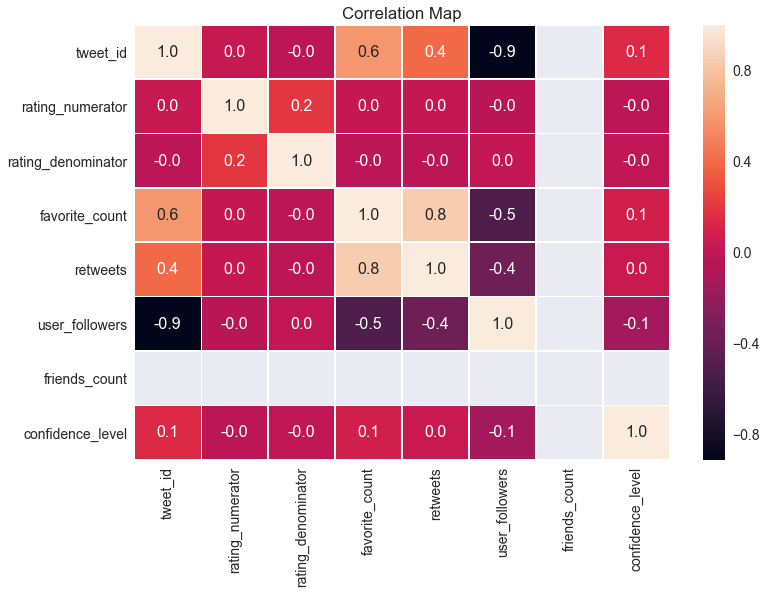

In [1263]:
# Seaborn heat map for correlation
# https://stackoverflow.com/questions/33104322/auto-adjust-font-size-in-seaborn-heatmap
# For annot font size - annot_kws={"size":16}
# annot=True to see the values

sns.set(font_scale=1.4)
f,ax = plt.subplots(figsize=(12, 8))
#sns.heatmap(df_master.corr(), vmin = -1, vmax = 1, annot = True, annot_kws={ "size":16},linewidth =0.5, fmt = '.2f',ax=ax)
sns.heatmap(df_master.corr(), annot=True, annot_kws={"size":16}, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map')

#### From the correlation plot
- There is a strong relationship between retweets and favourite_count and this makes sense
- user followers and retweets have a negative correlation of -0.4
- similarly user_followers and favorites_count have a negative correlation of -0.5

#### Plot between the retweets and favourite_count

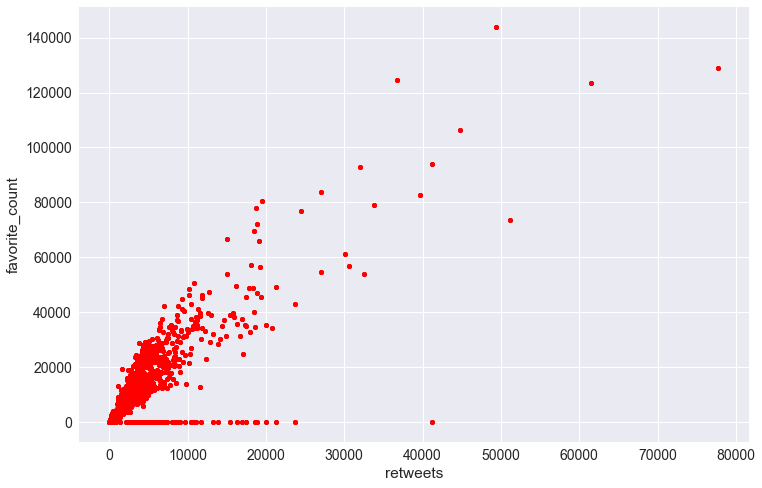

In [1264]:
df_master.plot(kind ='scatter', x = 'retweets', y ='favorite_count', figsize =(12, 8), color = 'red', )

In [988]:
# We can see the strong correlation in the scatter_plot i.e when the retweets go high, so does the favorite_count

#### Dog stages

In [989]:
list(df_master)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'favorite_count',
 'retweets',
 'user_followers',
 'friends_count',
 'dog_stage',
 'prediction_algorithm',
 'confidence_level']

In [1268]:
df_master[df_master.dog_stage != 'None']['dog_stage'].value_counts()

pupper     222
doggo      80 
puppo      24 
floofer    8  
Name: dog_stage, dtype: int64

In [1289]:
# Getting the count for the dog_stages
dog_stage_count_list = df_master[df_master.dog_stage != 'None']['dog_stage'].value_counts().tolist()
dog_stages_list = df_master[df_master.dog_stage != 'None']['dog_stage'].value_counts().index.tolist()

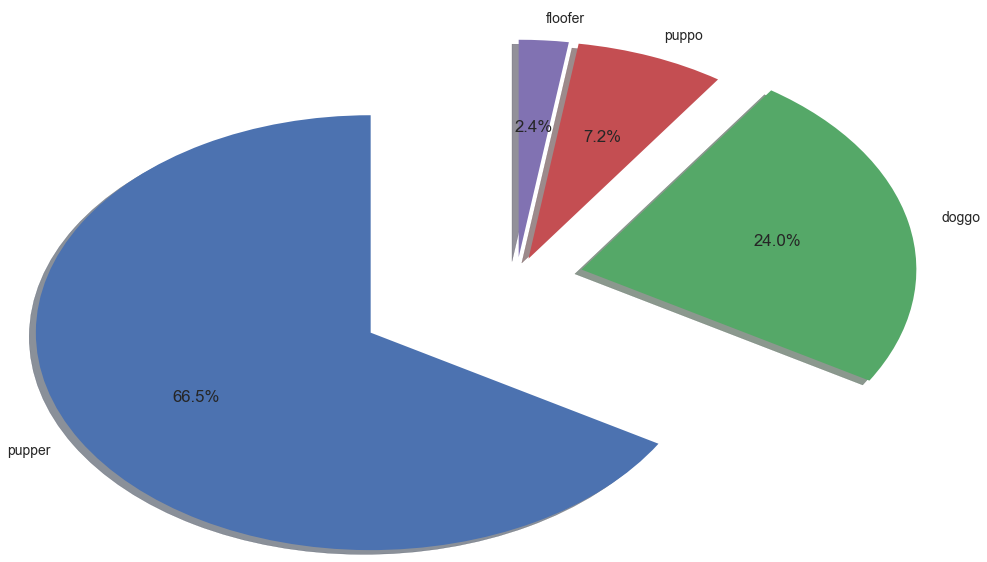

In [1356]:
# Plot a pie chart for dog_stage values
# A simple pie chart
# Ref: https://matplotlib.org/gallery/pie_and_polar_charts/pie_demo2.html#sphx-glr-gallery-pie-and-polar-charts-pie-demo2-py
explode =(0.5, 0.2, 0.1, 0.1)
df_master[df_master.dog_stage != 'None']['dog_stage'].value_counts().plot(kind = 'pie', explode = explode,
                                                                          autopct='%1.1f%%', startangle=90, shadow=True, 
                                                                          labels = dog_stages_list, radius = 1);

plt.savefig('dog-stages-pie.png')

In [1312]:
# Another pie chart in a perfect circular shape.
# Getting the count for the dog_stages
#dog_stage_count_list = df_master[df_master.dog_stage != 'None']['dog_stage'].value_counts().tolist()
#dog_stages_list = df_master[df_master.dog_stage != 'None']['dog_stage'].value_counts().index.tolist()

#explode =(0.05, 0.02, 0.01, 0.01) # to make the bigger portions stand out, the higher the value the more protruded it is
#plt.pie(dog_stage_count_list, explode = explode, labels = dog_stages_list, autopct='%1.1f%%', shadow=True, radius = 2);


In [1311]:
# Alterntaive pair plots

#explode = (0.04, 0.03, 0.02, 0.01)
#fig1, ax1 = plt.subplots()
#ax1.pie(dog_stage_count_list, explode = explode, labels = dog_stages_list, shadow = True, startangle = 90, radius= 2)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

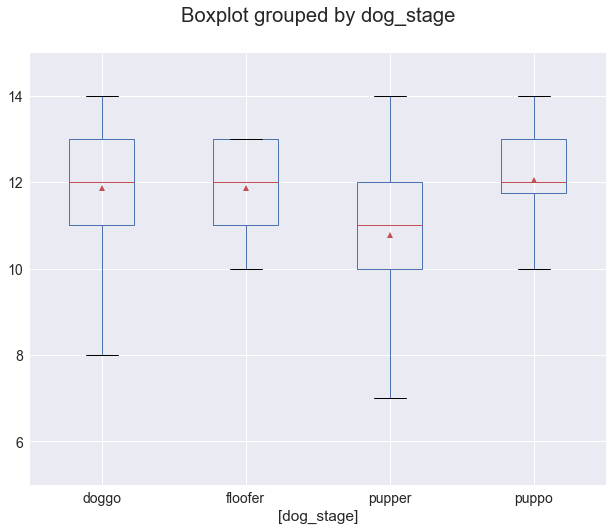

In [1333]:
# Dog stages with ratings plot - a box plot

#df_master[df_master.dog_stage != 'None'].boxplot(column = 'rating_numerator', labels = 'dog_stage');
import seaborn
df_master[df_master['dog_stage'] != 'None'].boxplot(column = ['rating_numerator'], by = ['dog_stage'],figsize = (10,8),
                                                   showmeans = True)
plt.ylim(5,15)
plt.title('');

In [ ]:
# Using seaborn
sns.boxpot(x = dog_stage, y = rating_numer)

In [1334]:
list(df_master)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'favorite_count',
 'retweets',
 'user_followers',
 'friends_count',
 'dog_stage',
 'prediction_algorithm',
 'confidence_level']

dog_stage
doggo      11.862500
floofer    11.875000
pupper     10.779279
puppo      12.041667
Name: rating_numerator, dtype: float64

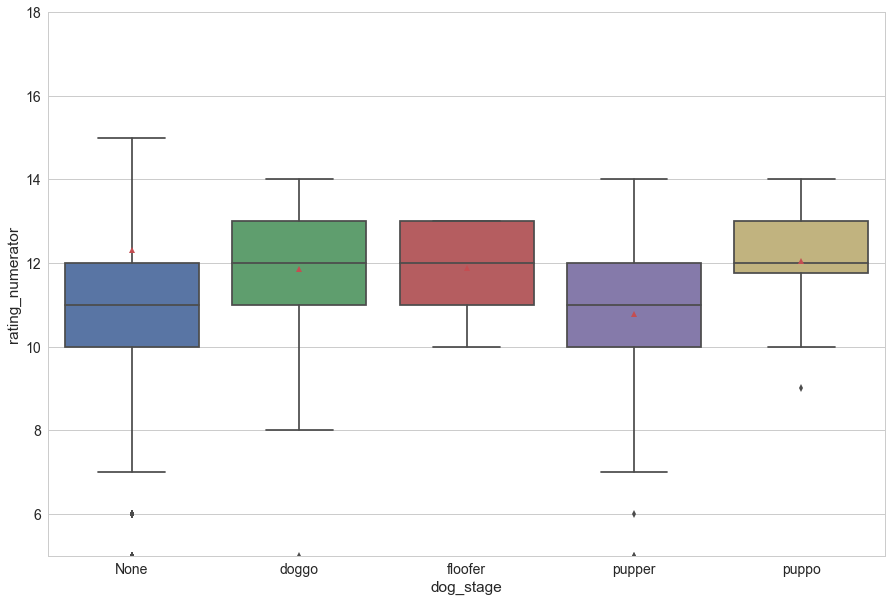

In [1353]:
# Using seaborn
# Ref: https://stackoverflow.com/questions/33227473/how-to-set-the-range-of-y-axis-for-a-seaborn-boxplot
plt.rcParams['figure.figsize']=(15,10) # setting the dimensions for the plot
#sns.set_style("whitegrid")
sns.boxplot(x = 'dog_stage', y= 'rating_numerator',showmeans = True, data= df_master)
plt.ylim(5,18); # Applying range filter for y-axis
plt.savefig('ratings-dogstages.png')
# Mean ratings by dog_stages
df_master[df_master['dog_stage'] != 'None'].groupby('dog_stage')['rating_numerator'].mean()

In [1394]:
list(df_master)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'favorite_count',
 'retweets',
 'user_followers',
 'friends_count',
 'dog_stage',
 'prediction_algorithm',
 'confidence_level']

In [1407]:
# Rename the prediction_algorithm' column to 'dog_breed' for better understanding
df_master.rename(columns ={'prediction_algorithm':'dog_breed'}, inplace=True)

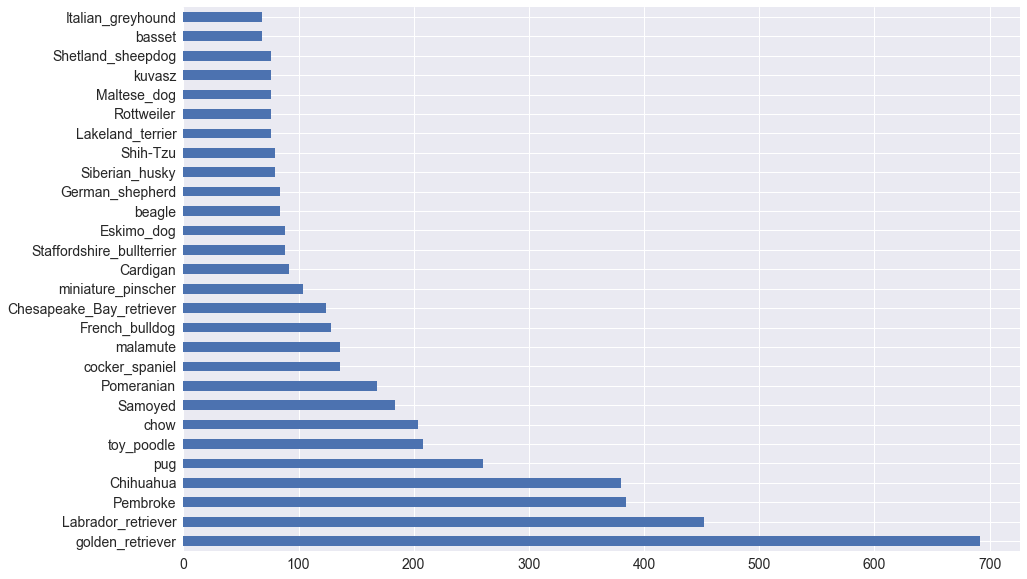

In [1476]:
# Breed count 
not_nan = df_master[df_master.dog_breed != 'NaN']
count = not_nan.dog_breed.value_counts()
sns.set_style('darkgrid')
count[count.values > 64].plot(kind ='barh')

## Conclusion

Using data from 3 different data source, including one which included API calls to twitter to get more details based on a tweet id, data wrangling was performed after gathering, assessing and cleaning up the data which forms quite significant part of this project. For data visualization , corrleation plot was explored and different types of charts plotted